In [1]:
import numpy as np

from template_funciones_2 import *#calcula_L, calcula_lambda, calcula_R, calcula_Q, metpot1, metpot2, metpotI,  metpotI2, laplaciano_iterativo, calcula_2E, deflaciona
from template_funciones import *#calcular_inversa, calculaLU
%load_ext autoreload
%autoreload 2

A = np.array([
   [0, 1, 1, 1, 0, 0, 0, 0],
   [1, 0, 1, 1, 0, 0, 0, 0],
   [1, 1, 0, 1, 0, 1, 0, 0],
   [1, 1, 1, 0, 1, 0, 0, 0],
   [0, 0, 0, 1, 0, 1, 1, 1],
   [0, 0, 1, 0, 1, 0, 1, 1],
   [0, 0, 0, 0, 1, 1, 0, 1],
   [0, 0, 0, 0, 1, 1, 1, 0]
])

In [2]:
L = calcula_L(A)

print(f"Matriz L:\n{L}")

mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")

Matriz L:
[[ 3. -1. -1. -1.  0.  0.  0.  0.]
 [-1.  3. -1. -1.  0.  0.  0.  0.]
 [-1. -1.  4. -1.  0. -1.  0.  0.]
 [-1. -1. -1.  4. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  4. -1. -1. -1.]
 [ 0.  0. -1.  0. -1.  4. -1. -1.]
 [ 0.  0.  0.  0. -1. -1.  3. -1.]
 [ 0.  0.  0.  0. -1. -1. -1.  3.]]

Autovector = 
[ 0.4253254   0.4253254   0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 1.308745664252509

El corte minimo para A es 2.0


Para encontrar $\Lambda$ tenemos que encontrar el vector $s^{\Lambda}$ optimo que la minimice. Eso equivale a hallar el autovector asociado al segundo autovalor mas pequeño en modulo de $L$ 

In [3]:
mu = 10e-5
v1, l1, _ = metpotI2(L, mu)
print(f"\nAutovector = \n{v1}\n\nAsociado a λ_1 = {l1}")

LAMBDA = calcula_lambda(L, v1)
print(f"\nEl corte minimo para A es {LAMBDA}")


Autovector = 
[ 0.4253254   0.42532541  0.26286556  0.26286556 -0.26286556 -0.26286556
 -0.4253254  -0.4253254 ]

Asociado a λ_1 = 1.3087456642527753

El corte minimo para A es 2.0


In [4]:
s = [1,0,-1]
s_i = np.sign(s)
s_i

array([ 1,  0, -1])

In [5]:
# ver que el auto valor mas chico es 0 y esta asociodo al autvector de 1s
# TODO: no me esta dando 0 je
M = L + mu * np.eye(A.shape[0])
print(np.linalg.eigvals(M))
v1, l1, _ = metpotI(L, mu)
v1, l1-mu

[5.23616798e+00 4.00010000e+00 1.00000000e-04 7.64032023e-01
 6.00010000e+00 4.00010000e+00 4.00010000e+00 4.00010000e+00]


(array([-0.35355339, -0.35355339, -0.35355339, -0.35355339, -0.35355339,
        -0.35355339, -0.35355339, -0.35355339]),
 np.float64(9999.999900002753))

Para hallar el corte minimo podemos hacer recursion sobre la red separandola en $k$ iteraciones. Obteniendo asi $2^{k}$ comunidades.

In [6]:
k = 2
print(laplaciano_iterativo(A, k))

[[1], [0, 2, 3], [4, 6, 7], [5]]


Otra forma de hallar comunidades tiene que ver con la **modularidad**. Donde el objetivo esta en maximizar $Q$. Para eso necesitamos el autovector con autovalor de mayor modulo de la matriz $R = A - P$. $R$ es simetrica. La modularidad puede calcularse entonces como $Q = \frac{1}{4E} s^{t}Rs$ con $2E = \sum_{i}^{n} \sum_{j}^{n} A_{ij}$

In [7]:
#Calculamos R
R = calcula_R(A)

print(f"Vemos que R es simetrica, R = R^t: \n{R == R.T}")
#Calculamos su autovector con autovalor de mayor modulo con el metodo de la potencia
v1, l1, _ = metpot1(R)

print(f"\nAutovector: {v1}\nAsociado a λ_1 = {l1}")

Q = calcula_Q(R, v1)

E2 = calcula_2E(A)

# Hace falta dividir por 1/4E ???
Q = Q * 1/(2*E2)
print(f"\nLa modularidad de la red es {Q}")


Vemos que R es simetrica, R = R^t: 
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]

Autovector: [-0.3847545  -0.3847545  -0.31933572 -0.31930025  0.31930025  0.31933572
  0.3847545   0.3847545 ]
Asociado a λ_1 = 2.9812811403926602

La modularidad de la red es 0.4209183673469387


Podemos aplicar iterativamente sobre los nuevos grupos obtenidos cuando aplicamos la modularidad. El caso en donde el algoritmo para es cuando dividir un grupo no aumenta la modularidad total


In [8]:
print(modularidad_iterativo(A))

[[4, 5, 6, 7], [0, 1, 2, 3]]


Aqui podemos ver como con el metodo de la potencia los componentes del vector aproximado en $\R^{3}$ converge al autovector asociado al autovalor de mayor modulo. 

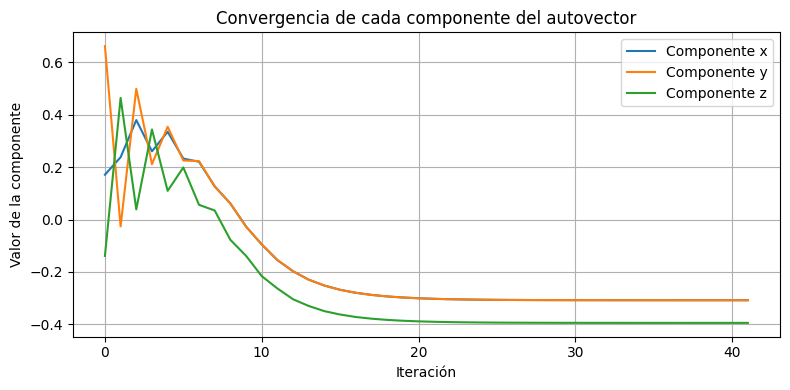

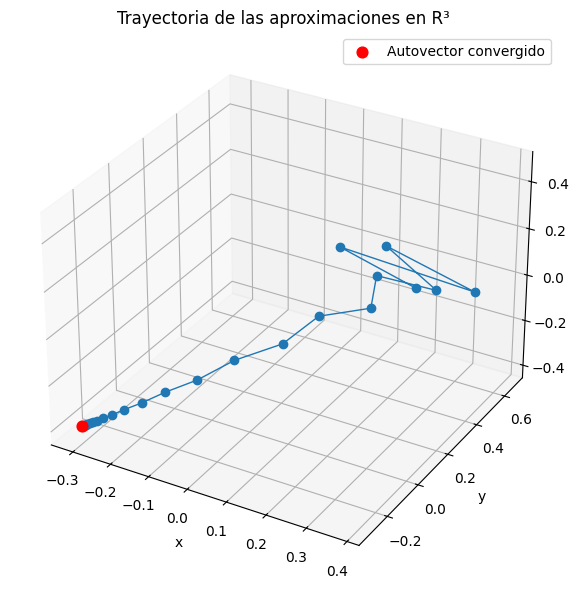

In [9]:
def metpot(A,v,k):
    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
    return v

# A = np.array([[0.9, 0.075, 0.025], [0.15, 0.8, 0.05], [0.25, 0.25, 0.5]])
# v = np.array([1,0.5,-0.75])


avec, aval, _ = metpot1(A, 1e-10, plot=True)


### 1 - Autovectores y autovalores de $L$ y $R$

a) Muestre que el vector unos es autovector de las matrices $R$ y $L$. ¿Que autovalor tiene? ¿Y que agrupacion de la red representa?

### 2 - Extensiones metodo de la potencia

#### Shifting de autovalores

In [10]:
avec_A, aval_A,_ = metpot1(A)

print(f"Autovector de A:\n{avec_A}\nautovalor asociado: {aval_A}")
mu = 3
M = A + mu*np.eye(A.shape[0])

avec_M, aval_M, _ = metpot1(M) 
print(f"Autovector de A:\n{avec_M}\nautovalor asociado: {aval_M}")

print("aval_A + mu == aval_M: ",np.allclose(aval_A + mu, aval_M))

# Como A tiene 0 en su diagonal diremos que M = A + 0I para confirmar que M no es inversible

calcular_inversa(*calculaLU(A))

Autovector de A:
[0.30776776 0.30776776 0.39415053 0.39415118 0.39405425 0.39405489
 0.30764444 0.30764444]
autovalor asociado: 3.5615527883275235
Autovector de A:
[0.30754855 0.30754855 0.3939797  0.3939797  0.39422568 0.39422568
 0.30786361 0.30786361]
autovalor asociado: 6.561552653043549
aval_A + mu == aval_M:  True
La matriz no es inversible


/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:45: RuntimeWarning: invalid value encountered in multiply
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:45: RuntimeWarning: invalid value encountered in cast
  U[j, i:] = U[j, i:] - factor * U[i, i:]  # Esacalonamos las filas
/home/agus/UBA/TP2-alc-2025-2C/template_funciones.py:44: RuntimeWarning: invalid value encountered in scalar divide
  factor = U[j, i] / U[i, i]  # Calculo del factor de eliminacion


#### Método de la potencia inverso

Por lo mencionado anteriormente si  $\lambda_{i} \neq 0 \forall i \rightarrow L + \mu I$ es inversible. Nos podemos asegurar de que ningun elemento de la diagonal sea igual a 0.  

In [11]:
L = calcula_L(A)
mu = 1
print(np.diag(L+mu*np.eye(L.shape[0])))

v1, l1, _ = metpotI(L, mu)
print(f"Autovector de autovalor mas chico:\n{v1}\nAutovalor mas chico: {l1}")

#El autovalor es casi 1 ya que le sumamos 1 a los autovalores de L. Si lo restamos obtenemos el autovalor mas chico en modulo de L que es 0.
print(np.allclose(0,l1-mu))

[4. 4. 5. 5. 5. 5. 4. 4.]
Autovector de autovalor mas chico:
[0.35355339 0.35355339 0.35355339 0.35355339 0.35355339 0.35355339
 0.35355339 0.35355339]
Autovalor mas chico: 1.0
True


#### Deflación de Hotelling

Usaremos $A$ que sabemos que es simetrica y por lo tanto tiene una base de autovectores ortogonales para mostrar que una vez deflacionada A, $deflaciona(A) = A'$ su autovector $v_{1}$ asociado al autovalor de mayor modulo $\lambda_{1}$ de A, ahora para $A'$ esta asociado al autovalor 0. Para eso vamos a suponer que si $\lambda = 0$ es el autovalor asociado a $v_{1}$ vale que:

$$ A'v_{1} = \lambda v_{1} = 0v_{1} = 0 $$

In [12]:
#Calculamos el autovector y autovalor de mayor modulo para A
v1,l1,_= metpot1(A,1e-17)

#Aplicamos la deflación a A para obtener A'
deflA = deflaciona(A)

#Calculamos A'v_1
print(deflA@v1)
print(np.allclose(0,deflA@v1))

[-4.11940100e-08 -4.11940101e-08 -3.21633218e-08 -3.21633012e-08
  3.21633002e-08  3.21633205e-08  4.11940091e-08  4.11940091e-08]
False


## Relacion TP1

In [13]:
# Carga de paquetes necesarios para graficar
import matplotlib.pyplot as plt
import geopandas as gpd # Para hacer cosas geográficas
import networkx as nx # Construcción de la red en NetworkX
from template_funciones import *

%load_ext autoreload
%autoreload 2

# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


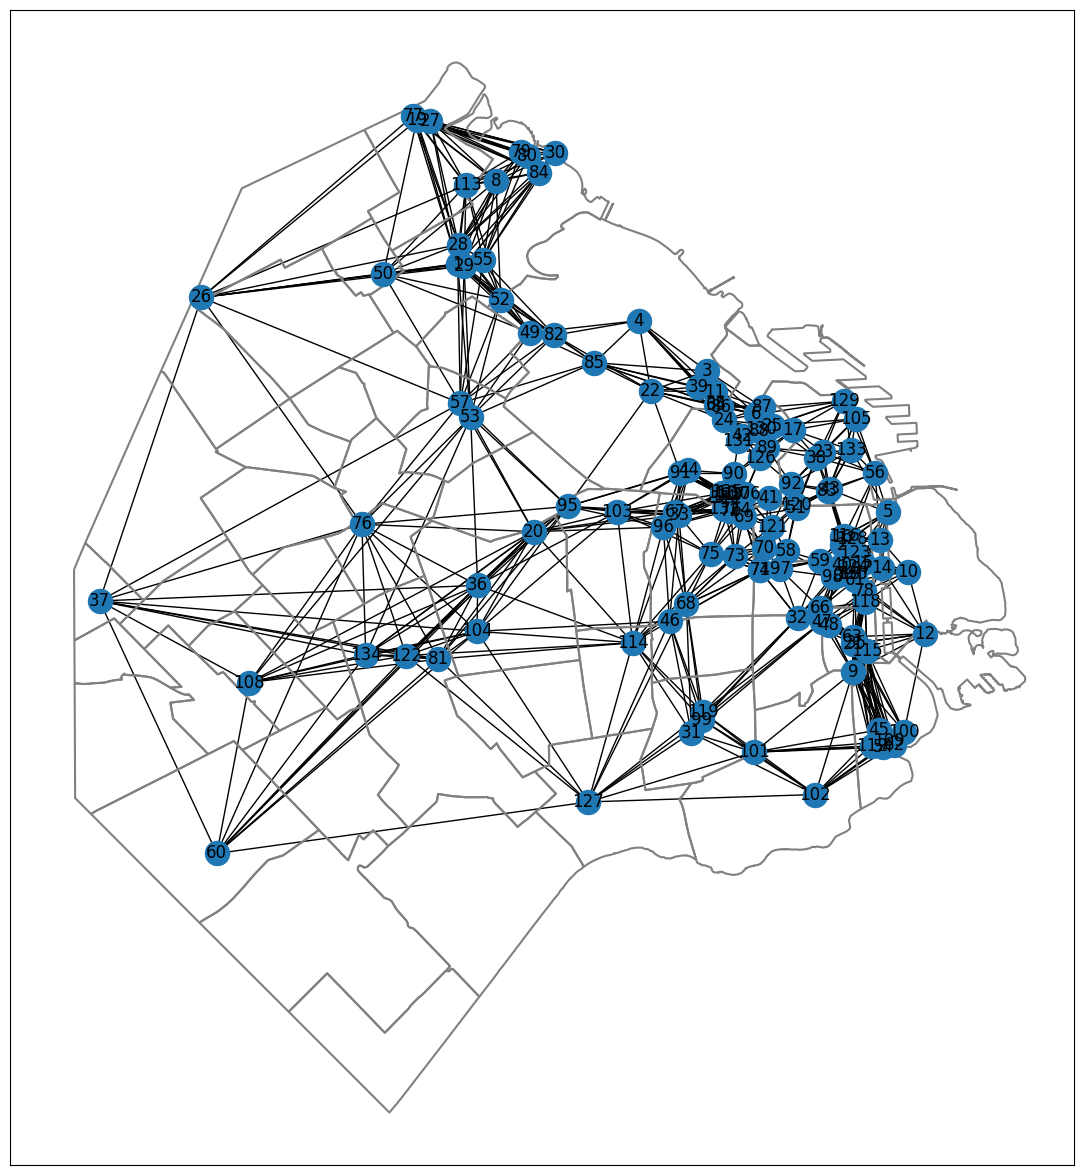

In [14]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa), 
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
m = 10 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

Calculando particiones optimas con el metodo del lapaciano para distintas redes

In [15]:
A = construye_adyacencia(D,10)
A_sim = np.ceil(1/2*(A + A.T))
print(A == A.T)

[[ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [False  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]]


In [ ]:
import matplotlib.colors as mcolors
import time


k = 2
ms = [3]
fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Cortes minimos en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"{2**k} grupos en red con {m} conexiones")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = laplaciano_iterativo(A_sim,k)

    print("Tiempo laplaciano: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} cortes minimos, con {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )


16 grupos en red con 3 conexiones


Modularidad en red de 3 conexiones.
Tiempo modularidad:  0.02256254399981117
Cantidad de grupos: 16
Grupo 0 | Museos: 5 | Color #1f77b4
Grupo 1 | Museos: 7 | Color #aec7e8
Grupo 2 | Museos: 9 | Color #ff7f0e
Grupo 3 | Museos: 9 | Color #ffbb78
Grupo 4 | Museos: 8 | Color #2ca02c
Grupo 5 | Museos: 13 | Color #98df8a
Grupo 6 | Museos: 10 | Color #d62728
Grupo 7 | Museos: 3 | Color #ff9896
Grupo 8 | Museos: 7 | Color #9467bd
Grupo 9 | Museos: 4 | Color #c5b0d5
Grupo 10 | Museos: 10 | Color #8c564b
Grupo 11 | Museos: 17 | Color #c49c94
Grupo 12 | Museos: 5 | Color #e377c2
Grupo 13 | Museos: 9 | Color #f7b6d2
Grupo 14 | Museos: 4 | Color #7f7f7f
Grupo 15 | Museos: 16 | Color #c7c7c7
Nodos con color asignado: 136
Modularidad en red de 5 conexiones.
Tiempo modularidad:  0.020350312999653397
Cantidad de grupos: 11
Grupo 0 | Museos: 11 | Color #1f77b4
Grupo 1 | Museos: 1 | Color #aec7e8
Grupo 2 | Museos: 21 | Color #ff7f0e
Grupo 3 | Museos: 13 | Color #ffbb78
Grupo 4 | Museos: 15 | Color #2ca02

/home/agus/UBA/TP2-alc-2025-2C/template_funciones_2.py:86: RuntimeWarning: invalid value encountered in divide
  avec1 = avec1 / np.linalg.norm(avec1, 2)  # normalizamos


Modularidad en red de 50 conexiones.
Tiempo modularidad:  0.004974272000254132
Cantidad de grupos: 2
Grupo 0 | Museos: 69 | Color #1f77b4
Grupo 1 | Museos: 67 | Color #ff7f0e
Nodos con color asignado: 136


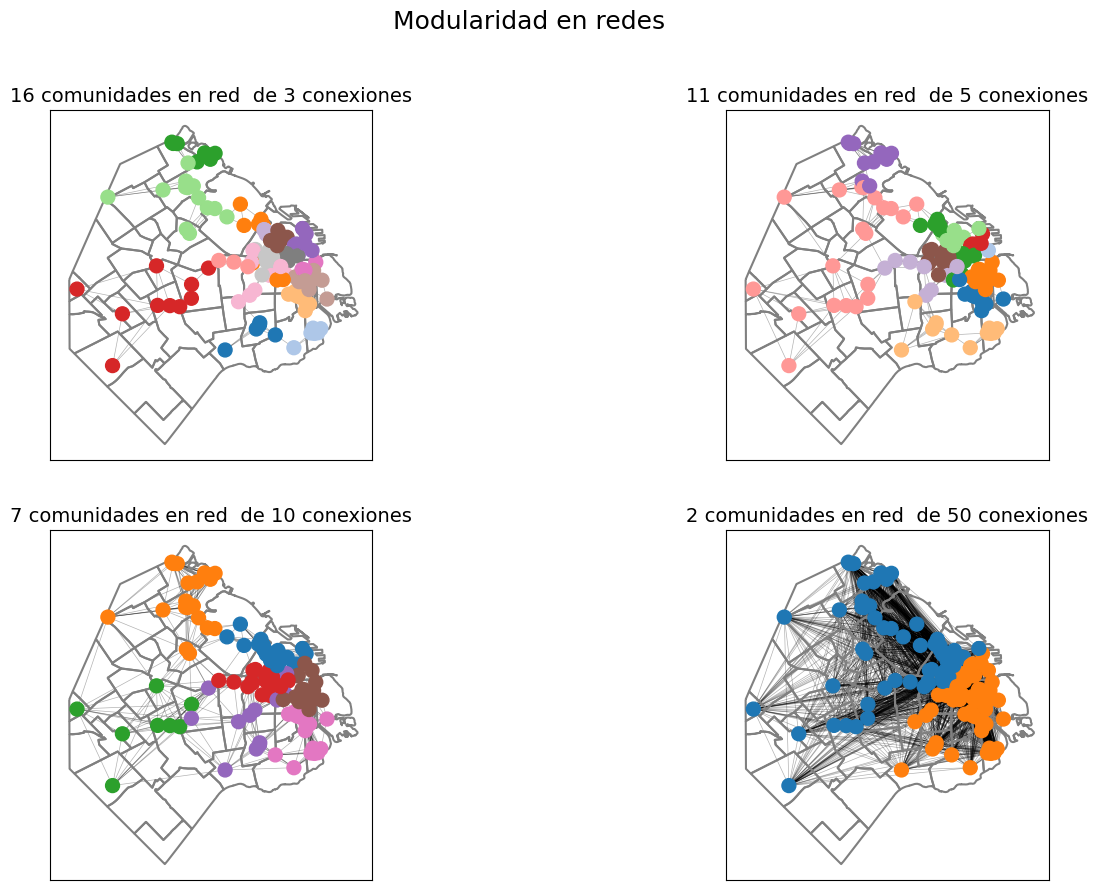

In [20]:
ms = [3,5,10,50]

fig, axs = plt.subplots(2, 2, figsize=(16, 10), squeeze=True)
fig.suptitle("Modularidad en redes", fontsize=18)
for idx_num, m in enumerate(ms):
    print(f"Modularidad en red de {m} conexiones.")
    start = time.perf_counter()
    
    A = construye_adyacencia(D,m)
    A_sim = np.ceil(1/2*(A + A.T))
    nombres = modularidad_iterativo(A_sim)

    print("Tiempo modularidad: ", time.perf_counter() - start)
    print(f"Cantidad de grupos: {len(nombres)}")
    

    axs = axs.flatten()
    num_grupos = len(nombres)
    colormap = plt.get_cmap('tab10' if num_grupos <= 10 else 'tab20')  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    # Asignar un color a cada grupo
    grupo_color = {}
    for grupo_id, grupo in enumerate(nombres):
        color = mcolors.to_hex(colormap(grupo_id % colormap.N))
        print(f"Grupo {grupo_id} | Museos: {len(grupo)} | Color {color}")
        for nodo in grupo:
            grupo_color[nodo] = color  # Asegura que la clave sea string

    print("Nodos con color asignado:", len(grupo_color))

    # Crear colores de nodos
    colores_nodos = [grupo_color.get(n, "#000000") for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"{num_grupos} comunidades en red  de {m} conexiones", fontsize=14)

    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    nx.draw_networkx_nodes(
    G,
    G_layout,
    node_size=100,
    ax=axs[idx_num],
    node_color=colores_nodos,
    )
    nx.draw_networkx_edges(
        G,
        G_layout,
        ax=axs[idx_num],
        alpha=0.3,
        width=0.5
    )

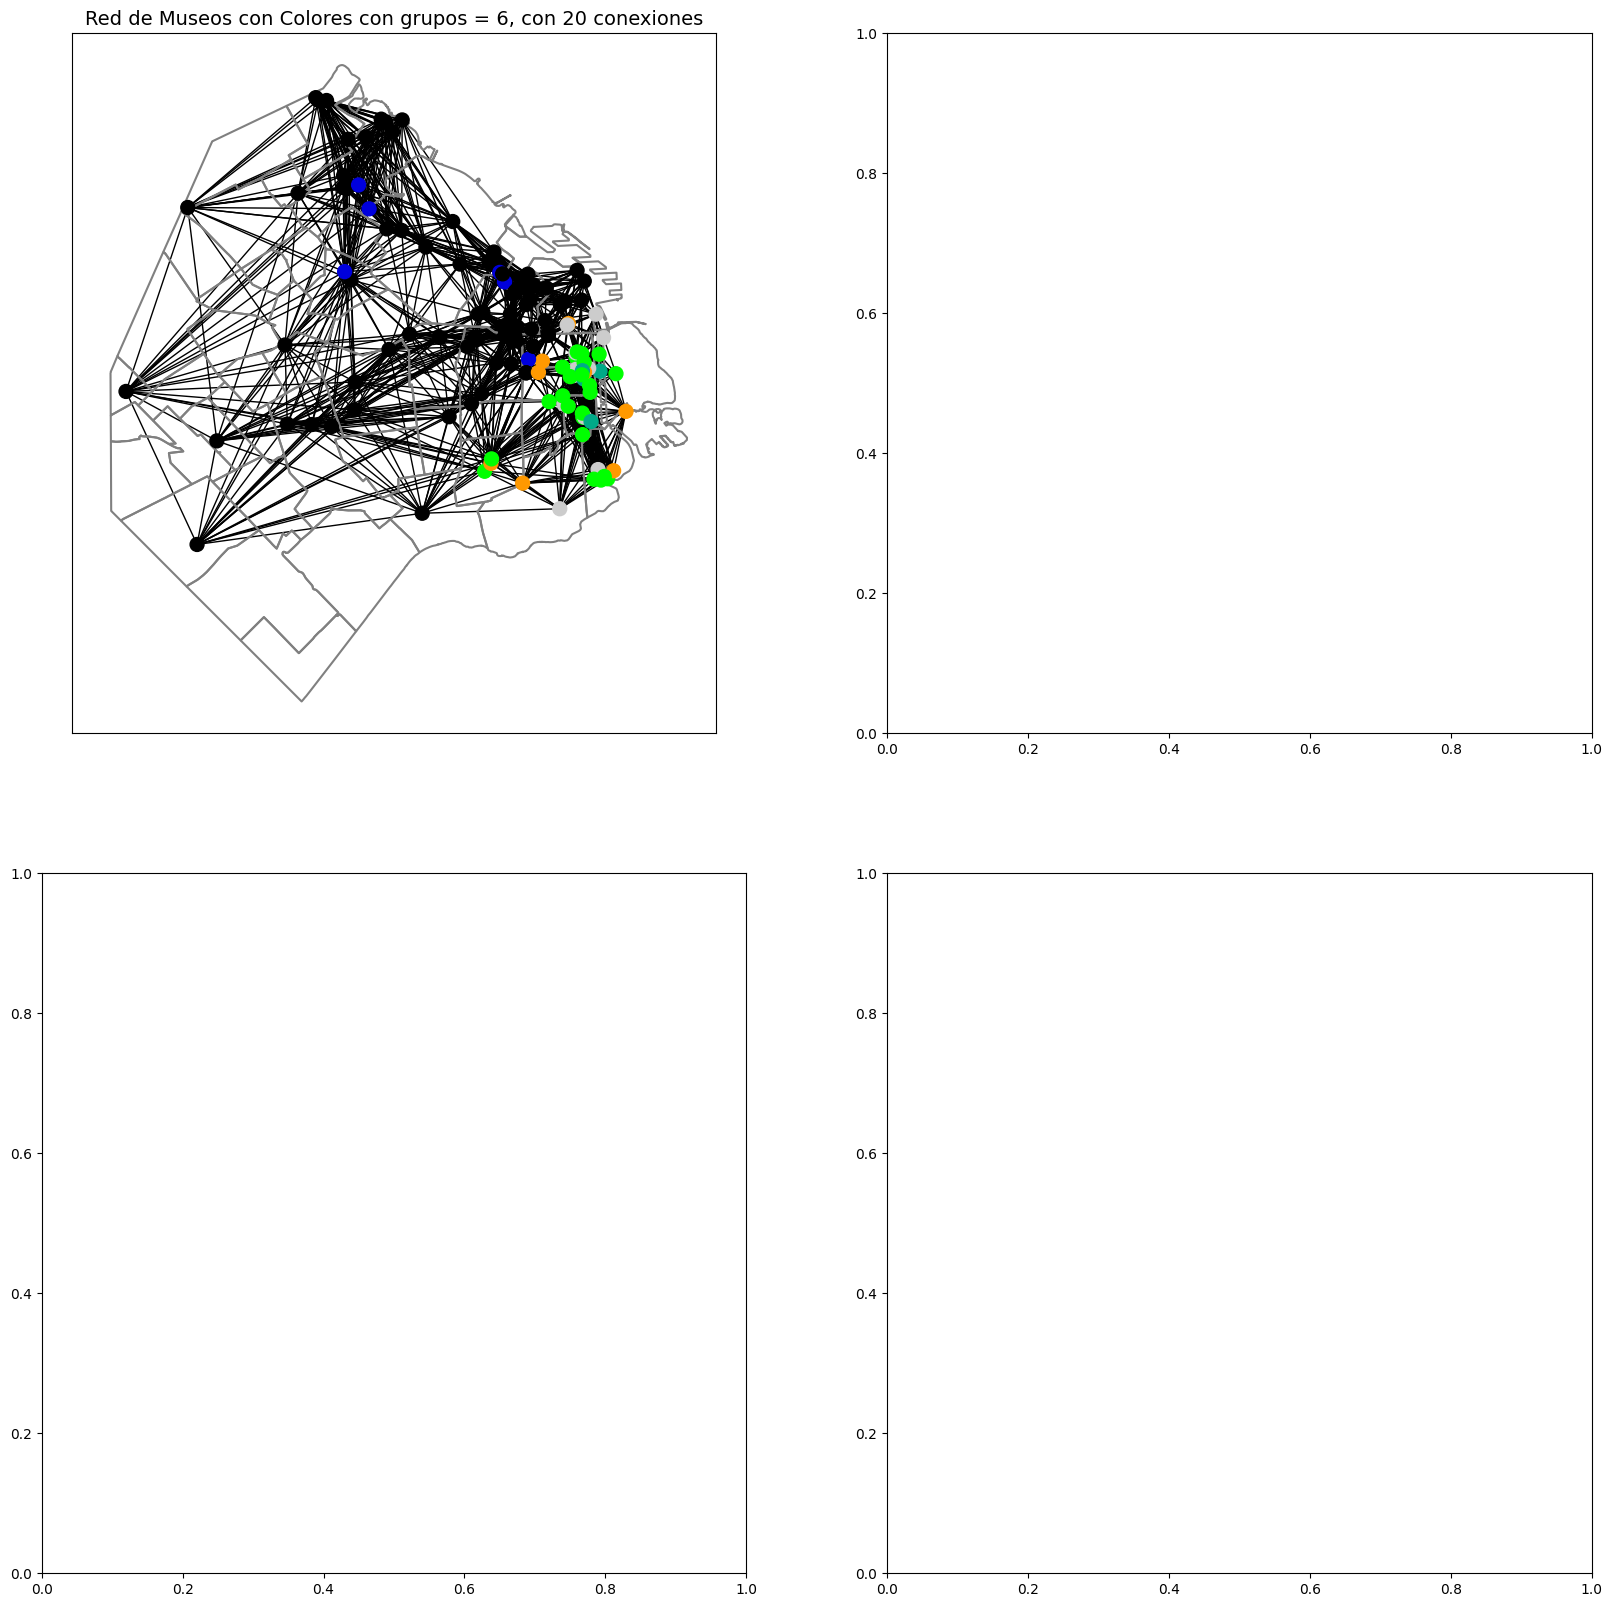

In [28]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for idx_num,cant_niveles in enumerate([2]): 
    A_sim = 1/2*(A + A.T) # Hacemos la matriz simétrica
    # nombres = laplaciano_iterativo(A_sim,niveles=cant_niveles) # Aplicamos el laplaciano iterativo
    nombres = modularidad_iterativo(A_sim) # Aplicamos el laplaciano iterativo
    grupo = {}
    for idx,i in enumerate(nombres):
        grupo[idx] = i


    axs = axs.flatten()
    num_grupos = len(grupo)
    colormap = plt.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    grupo_color = {}
    for i, grupo_id in enumerate(sorted(grupo.keys())):
        color = mcolors.to_hex(colormap(i))
        for nodo in grupo[grupo_id]:
            grupo_color[nodo] = color

    # Función para obtener color del nodo
    def asignar_color_dinamico(nodo):
        return grupo_color.get(nodo, "#000000")  # Negro si no se encuentra

    # Crear colores de nodos
    colores_nodos = [asignar_color_dinamico(n) for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"Red de Museos con Colores con grupos = {num_grupos}, con {m} conexiones", fontsize=14)

    nx.draw_networkx(
        G,
        G_layout,
        node_size=100,
        ax=axs[idx_num],
        with_labels=False,
        node_color=colores_nodos,
    )


KeyboardInterrupt: 

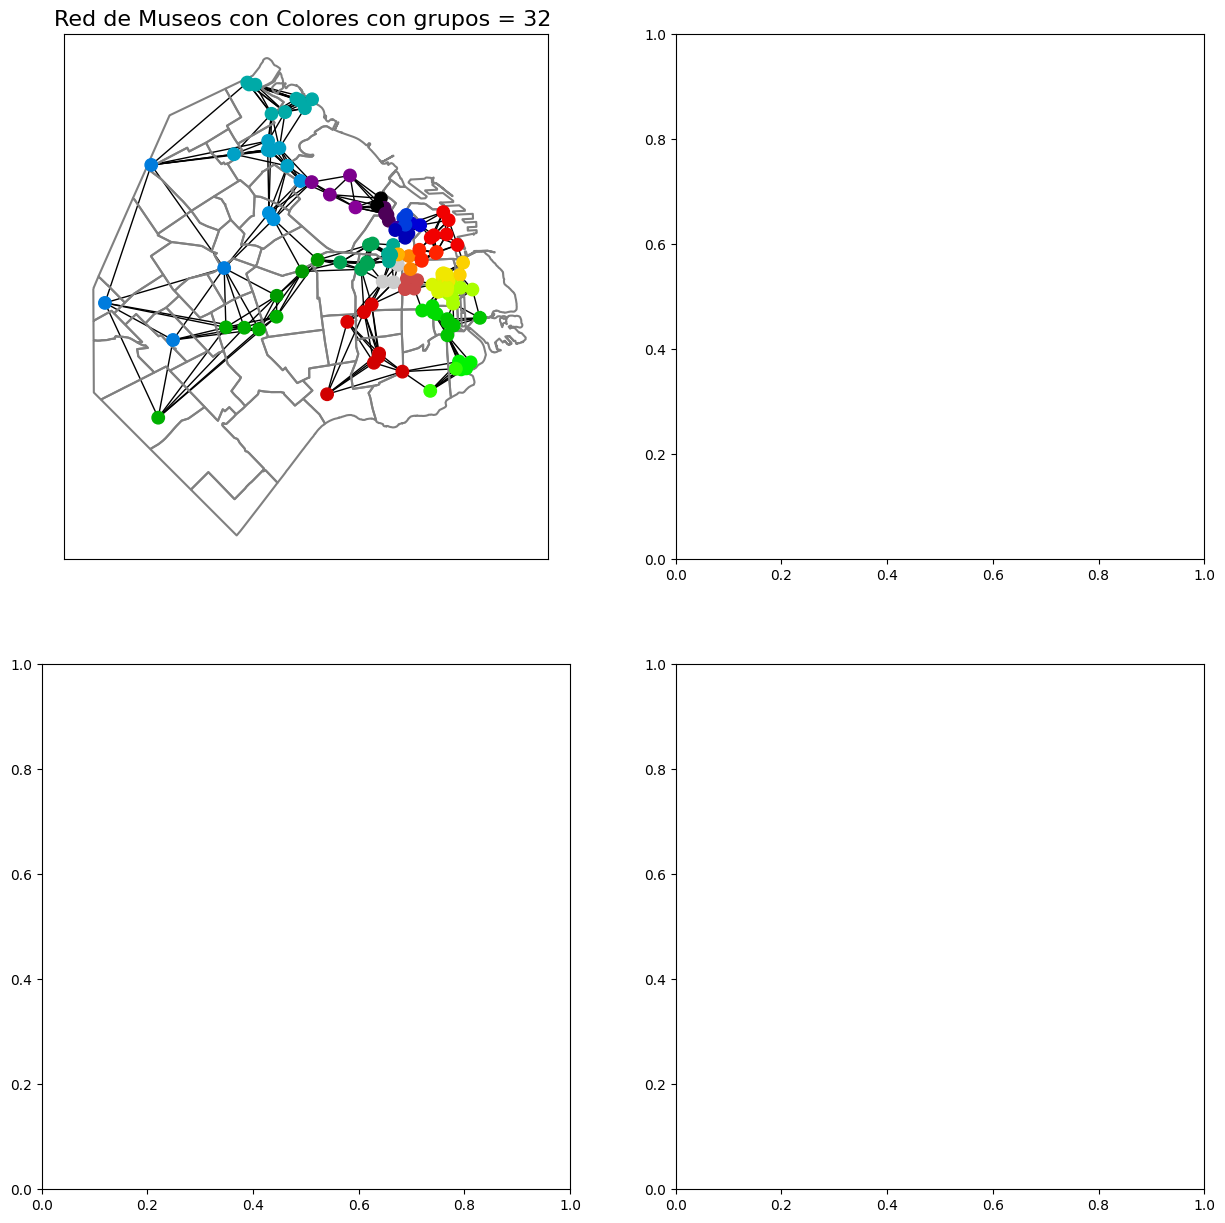

In [28]:
#TODO: Esto tarda mucho.
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

A_sim = 1/2*(A+ A.T) # Hacemos la matriz simétrica

for idx_num,cant_niveles in enumerate([5,6]): 
    nombres = laplaciano_iterativo(A_sim,niveles=cant_niveles) # Aplicamos el laplaciano iterativo
    grupo = {}
    for idx,i in enumerate(nombres):
        grupo[idx] = i


    axs = axs.flatten()
    num_grupos = len(grupo)
    colormap = plt.get_cmap('nipy_spectral', num_grupos)  # Elegí un mapa de colores. También podés usar 'hsv', 'Set3', etc.

    # Asignar un color a cada grupo
    grupo_color = {}
    for i, grupo_id in enumerate(sorted(grupo.keys())):
        color = mcolors.to_hex(colormap(i))
        for nodo in grupo[grupo_id]:
            grupo_color[nodo] = color

    # Función para obtener color del nodo
    def asignar_color_dinamico(nodo):
        return grupo_color.get(nodo, "#000000")  # Negro si no se encuentra

    # Crear colores de nodos
    colores_nodos = [asignar_color_dinamico(n) for n in G.nodes]

    # Dibujar
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=axs[idx_num])
    axs[idx_num].set_title(f"Red de Museos con Colores con grupos = {num_grupos} ", fontsize=16)

    nx.draw_networkx(
        G,
        G_layout,
        node_size=80,
        ax=axs[idx_num],
        with_labels=False,
        node_color=colores_nodos,
    )
